In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree

## read the file am_pm.csv to a dataframe

In [2]:
df = pd.read_csv('../data/am_pm.csv')
df.head()

,date,target,am,pm,predict
0,2020-04-17,working_day,21,2,weekend
1,2020-04-18,weekend,1,68,working_day
2,2020-04-19,weekend,18,15,working_day
3,2020-04-20,working_day,2,23,working_day
4,2020-04-21,working_day,0,25,working_day


##  draw a plot where the x-axis is am, the y-axis is pm, dots are the days, color depends on the target

In [3]:
X = df[['am','pm']].values
y = df['target'].values
clf = LogisticRegression(random_state=21, fit_intercept=False).fit(X, y)

In [4]:
x_line = np.array([min(df['am']), max(df['am'])])
y_line = (-clf.coef_[0][0] / clf.coef_[0][1]) * x_line

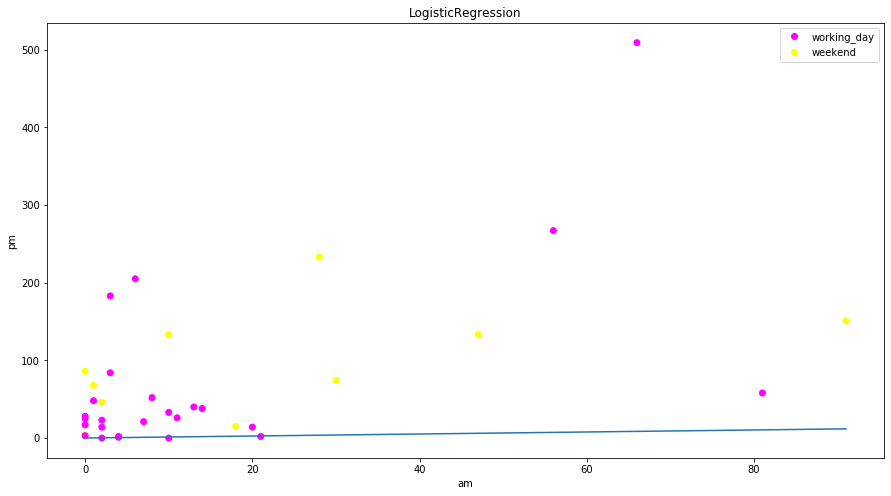

In [5]:
fig, ax = plt.subplots(figsize=(15, 8))
scatter = ax.scatter(x = df['am'], y=df['pm'], cmap='spring', 
                      c=[0 if i == 'working_day' else 1 for i in df.target])

handles, labels = scatter.legend_elements(prop='colors')
ax.plot(x_line, y_line, label='boundary')
ax.legend(handles, ['working_day', 'weekend'])
ax.set_title('LogisticRegression')
ax.set_xlabel('am')
ax.set_ylabel('pm')
plt.show()

##  draw the same plot (with the boundary), but the color should depend this time on the predictions

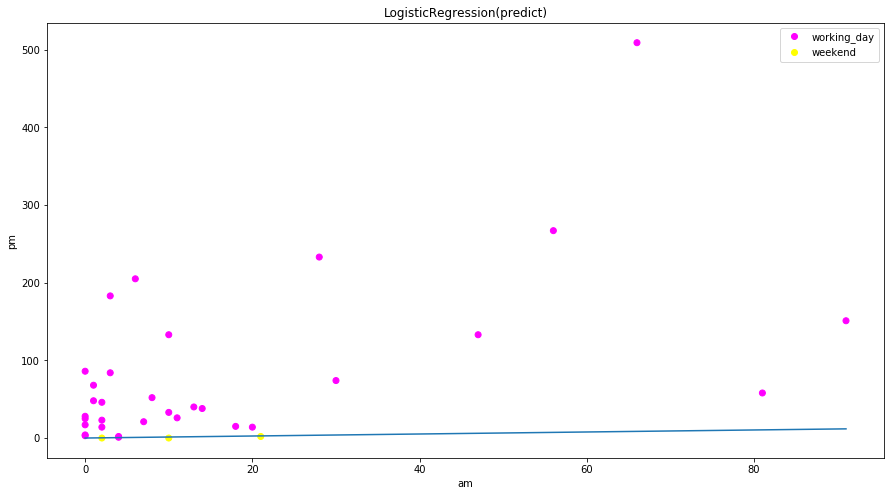

In [6]:
fig, ax = plt.subplots(figsize=(15, 8))
scatter = ax.scatter(x = df['am'], y=df['pm'], cmap='spring', 
                      c=[0 if i == 'working_day' else 1 for i in df.predict])

handles, labels = scatter.legend_elements(prop='colors')
ax.plot(x_line, y_line, label='boundary')
ax.legend(handles, ['working_day', 'weekend'])
ax.set_title('LogisticRegression(predict)')
ax.set_xlabel('am')
ax.set_ylabel('pm')
plt.show()

## apply StandardScaler to X and train logistic regression with the same parameters again

In [7]:
scaler = StandardScaler()
df[['am', 'pm']] = scaler.fit_transform(X)
df.head()

,date,target,am,pm,predict
0,2020-04-17,working_day,0.200690,-0.719904,weekend
1,2020-04-18,weekend,-0.655914,-0.071822,working_day
2,2020-04-19,weekend,0.072199,-0.592251,working_day
3,2020-04-20,working_day,-0.613084,-0.513696,working_day
4,2020-04-21,working_day,-0.698744,-0.494057,working_day


In [8]:
X = df[['am','pm']].values
y = df['target'].values
clf = LogisticRegression(random_state=21, fit_intercept=False).fit(X, y)

In [9]:
df['predict'] = clf.predict(X)

In [10]:
df.head()

,date,target,am,pm,predict
0,2020-04-17,working_day,0.200690,-0.719904,working_day
1,2020-04-18,weekend,-0.655914,-0.071822,working_day
2,2020-04-19,weekend,0.072199,-0.592251,working_day
3,2020-04-20,working_day,-0.613084,-0.513696,working_day
4,2020-04-21,working_day,-0.698744,-0.494057,working_day


In [11]:
accuracy_score(df['target'], df['predict'])

0.7428571428571429

In [12]:
x_line = np.array([min(df['am']), max(df['am'])])
y_line = (-clf.coef_[0][0] / clf.coef_[0][1]) * x_line

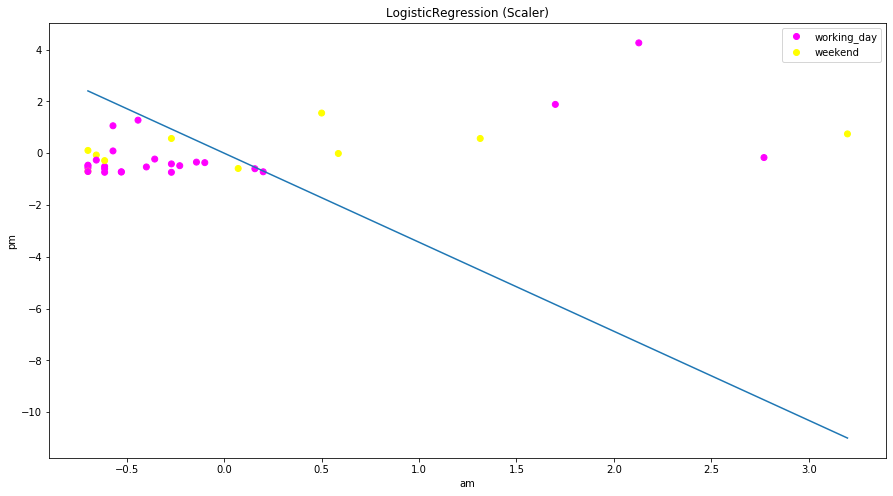

In [13]:
fig, ax = plt.subplots(figsize=(15, 8))
scatter = ax.scatter(x = df['am'], y=df['pm'], cmap='spring', 
                      c=[0 if i == 'working_day' else 1 for i in df.target])

handles, labels = scatter.legend_elements(prop='colors')
ax.plot(x_line, y_line, label='boundary')
ax.legend(handles, ['working_day', 'weekend'])
ax.set_title('LogisticRegression (Scaler)')
ax.set_xlabel('am')
ax.set_ylabel('pm')
plt.show()

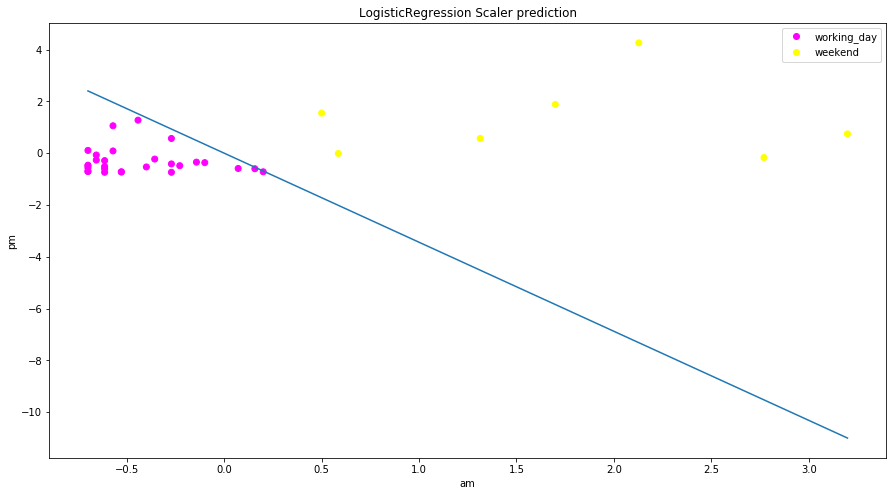

In [14]:
fig, ax = plt.subplots(figsize=(15, 8))
scatter = ax.scatter(x = df['am'], y=df['pm'], cmap='spring', 
                      c=[0 if i == 'working_day' else 1 for i in df.predict])

handles, labels = scatter.legend_elements(prop='colors')
ax.plot(x_line, y_line, label='boundary')
ax.legend(handles, ['working_day', 'weekend'])
ax.set_title('LogisticRegression Scaler prediction')
ax.set_xlabel('am')
ax.set_ylabel('pm')
plt.show()

## apply to the scaled dataframe SVC model with parameters probability=True, random_state=21

In [15]:
svc = SVC(probability=True, random_state=21).fit(X, y)
y_predict = svc.predict(X)
accuracy_score(y, y_predict)

0.7428571428571429

In [16]:
parameters = {'kernel':('linear', 'rbf', 'poly', 'sigmoid')}
svc = SVC(probability=True, random_state=21)
cv = GridSearchCV(svc, parameters, scoring='accuracy').fit(X,y)
cv.best_params_

{'kernel': 'poly'}

In [17]:
y_predict = cv.predict(X)
accuracy_score(y, y_predict)

0.7428571428571429

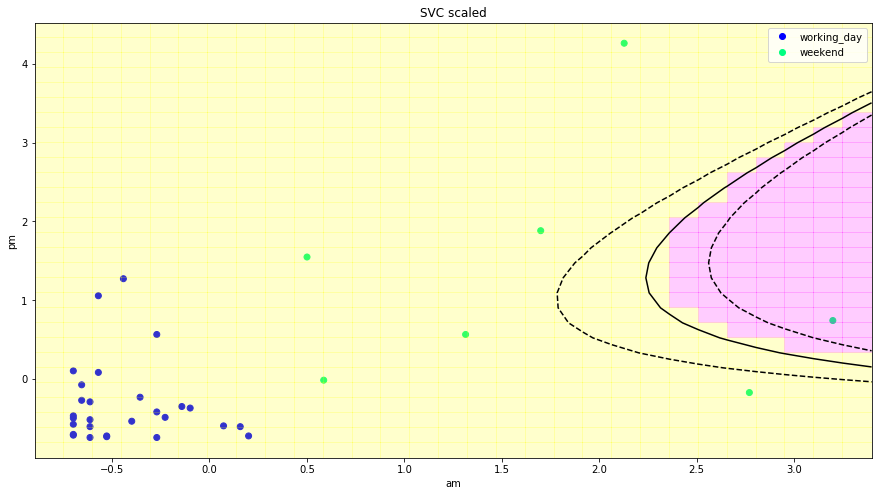

In [18]:
fig, ax = plt.subplots(figsize=(15, 8))
scatter = ax.scatter(x = df['am'], y=df['pm'], cmap='winter', 
                      c=[0 if i == 'working_day' else 1 for i in df.predict])
handles, labels = scatter.legend_elements(prop='colors')
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = cv.best_estimator_.decision_function(xy).reshape(XX.shape)
ax.pcolormesh(XX, YY, Z > 0, alpha=0.2, cmap='spring')
ax.contour(XX, YY, Z, colors='black', levels=[-0.5, 0, 0.5],
           linestyles=['--', '-', '--'])
ax.set_title('SVC scaled', fontsize=12)
ax.legend(handles, ['working_day', 'weekend'])
ax.set_xlabel('am')
ax.set_ylabel('pm')
plt.show()

##  apply to the scaled dataframe DecisionTreeClassifier with parameters max_depth=4, random_state=42

In [19]:
clf = DecisionTreeClassifier(max_depth=4, random_state=42).fit(X,y)

In [20]:
df['predict'] = clf.predict(X)

In [21]:
df.head()

,date,target,am,pm,predict
0,2020-04-17,working_day,0.200690,-0.719904,working_day
1,2020-04-18,weekend,-0.655914,-0.071822,weekend
2,2020-04-19,weekend,0.072199,-0.592251,working_day
3,2020-04-20,working_day,-0.613084,-0.513696,working_day
4,2020-04-21,working_day,-0.698744,-0.494057,working_day


In [22]:
accuracy_score(y, y_predict)

0.7428571428571429

In [23]:
param_grid = {'max_depth': np.arange(3, 21)}
cv = GridSearchCV(clf, param_grid, scoring='accuracy')
cv.fit(X,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=4,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11,

In [24]:
cv.best_params_

{'max_depth': 3}

In [25]:
clf = DecisionTreeClassifier(max_depth=3, random_state=42).fit(X,y)
df['predict'] = clf.predict(X)

In [26]:
accuracy_score(y, df['predict'])

0.8857142857142857

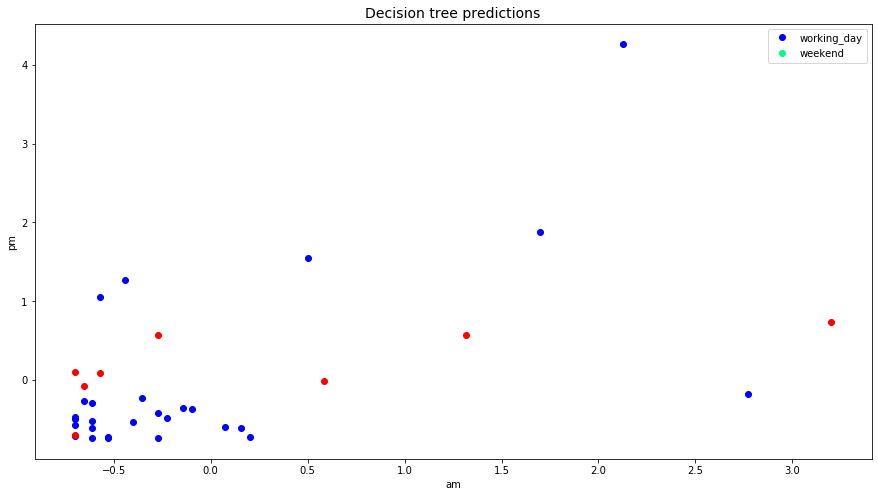

In [27]:
fig, ax = plt.subplots(figsize=(15, 8))
ax.scatter(x=df.loc[df['predict'] == 'working_day']['am'],
           y=df.loc[df['predict'] == 'working_day']['pm'],
           color='blue', label='working_day')
ax.scatter(x=df.loc[df['predict'] == 'weekend']['am'],
           y=df.loc[df['predict'] == 'weekend']['pm'],
           color='red', label='weekend')
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
ax.set_title('Decision tree predictions', fontsize=14)
ax.legend(handles, ['working_day', 'weekend'])
ax.set_xlabel('am')
ax.set_ylabel('pm')
plt.show()

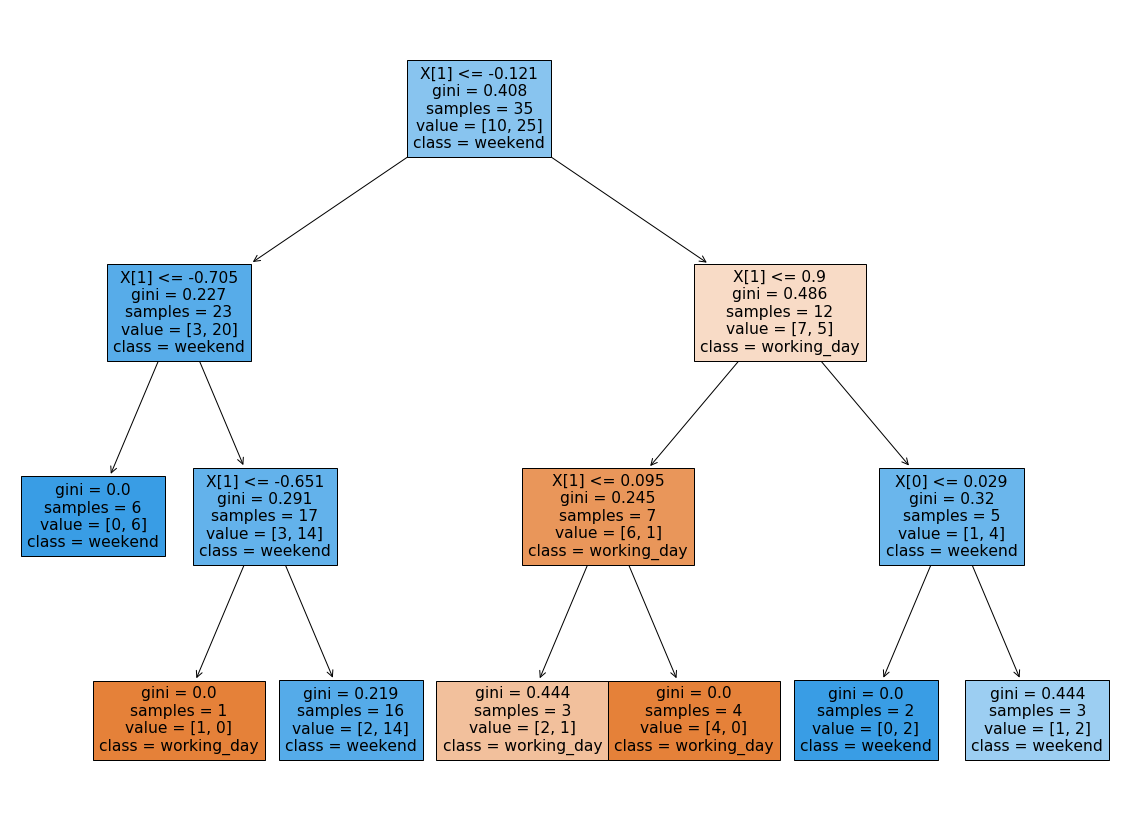

In [28]:
fig, ax = plt.subplots(figsize=(20, 15))
plot_tree(cv.best_estimator_, class_names=['working_day', 'weekend'],
          filled=True, ax=ax)
plt.show()